# Serie VII - Dominio de Reducción de la dimensionalidad

In [7]:
! pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


## E701 - Reducción de variables del Iris

Carga el Dataset del Iris y extrae la matriz X de características y el vector y de objetivos.

In [28]:
import pandas as pd
import os
from os.path import dirname

cwd = dirname(os.getcwd())
iris = pd.read_csv(f"{cwd}/datasets/iris.csv")

X = iris[ ["sepal.length", "sepal.width", "petal.length", "petal.width"] ].values
y = iris["variety"].values

X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

Grafica la columna sepal.length contra sepal.width en puntos, usando variety como el color.

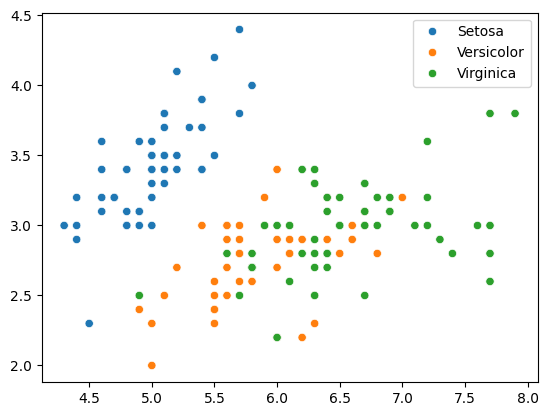

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X[:, 0], y = X[:, 1], hue=y)
plt.show()

Crea una matriz Xp con los primeros 2 componentes principales de X.

In [31]:
from sklearn.decomposition import PCA
Xp = PCA(n_components=2).fit_transform(X)

Grafica la columna del primer componente de Xp contra el segundo componente de Xp en puntos, usando variety como el color.

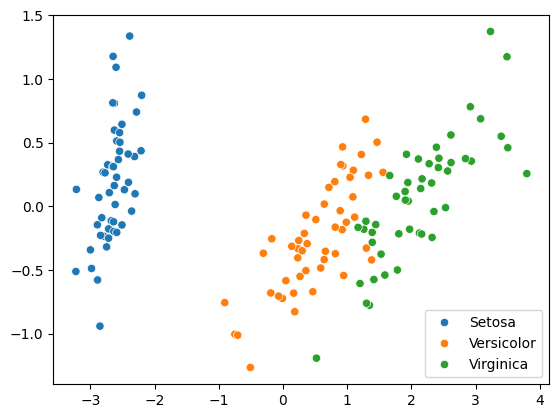

In [33]:
sns.scatterplot(x=Xp[:, 0], y = Xp[:, 1], hue=y)
plt.show()

Contrasta ambas gráficas indicando visualmente si es posible separar las clases con una recta en ambas gráficas (usa una captura de pantalla y dibuja a mano las rectas).

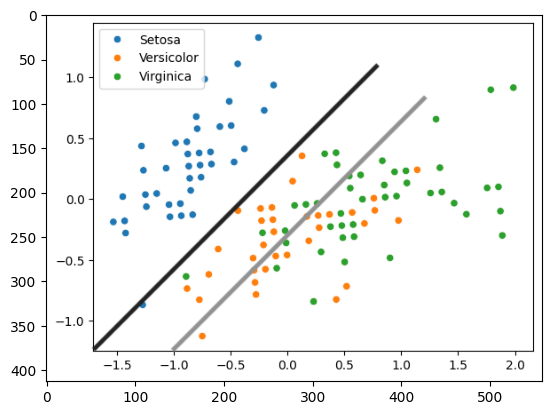

In [34]:
import matplotlib.pyplot as plt
from PIL import Image
imagen = Image.open("rectas.png")
plt.imshow(imagen)
plt.show()

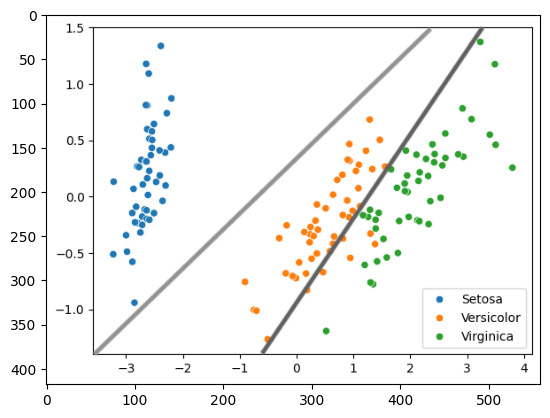

In [35]:
import matplotlib.pyplot as plt
from PIL import Image
imagen = Image.open("rectas-xp.png")
plt.imshow(imagen)
plt.show()

## E702 - Reducción de muchas características

Busca un Dataset con muchas características numéricas, por ejemplo, las reseñas de usuarios o datos de personas.
Extrae los primeros 2 componentes principales y genera la gráfica de puntos.

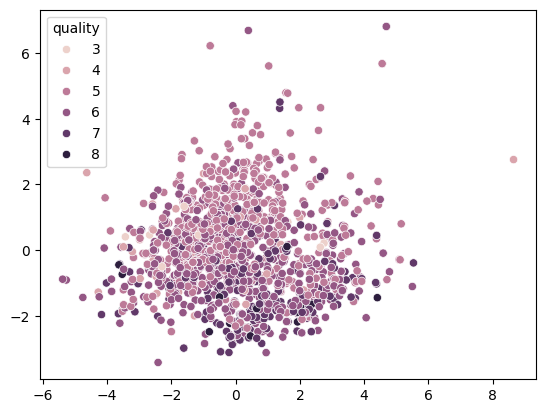

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
from os.path import dirname
import matplotlib.pyplot as plt

cwd = dirname(os.getcwd())
data = pd.read_csv(f"{cwd}/datasets/winequality-red.csv", sep=";")
numeric_features = data.drop(columns=["quality"])
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numeric_features_scaled)
target = data["quality"]
sns.scatterplot(x=reduced_data[:, 0], y = reduced_data[:, 1], hue=target)
plt.show()

Dibuja manualmente elipsoides que separarían los datos.

Determina visualmente el centro de uno de los elipsoides.

Calcula la distancia de los 2 componentes al centro del elipsoide seleccionado.

Obtén el índice del registro en la matriz de los 2 componentes más cercano al elipsoide.

Muestra todas las características del registro de la matriz original en ese índice.

Este debería representar la muestra más cercana al elipsoide.

/Users/alexiscortes/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


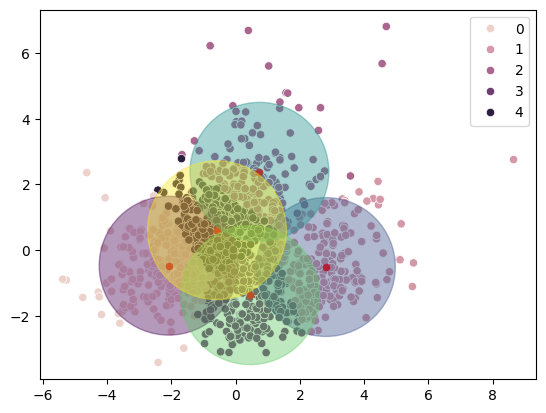

In [34]:
# Nota: en la grafica anterior no es posible dibujar eclipsoides, por lo que hice un intento
# de usar KMeans y visualizar los centros de los cluste para representar la muestra mas cercana

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(reduced_data)
yp = kmeans.predict(reduced_data)
centroids = kmeans.cluster_centers_

import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=yp)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'red')
plt.scatter(centroids[:, 0], centroids[:, 1], s=10000, c=range(5), cmap="viridis", alpha=0.40)

plt.show()

## E703 - Regresión lineal de la característica principal

Usa el Dataset con muchas características numéricas para reducir un solo componente principal y aplicar una regresión lineal hacia un objetivo.

Determina si el $R^2$ es mayor o igual a `0.3` para considerarse suficiente.

In [44]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

pca = PCA(n_components=1)
X_pca = pca.fit_transform(numeric_features_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
if r2 >= 0.3:
    print(f"El modelo de regresión tiene un R^2 suficiente: {r2:.2f}")
else:
    print(f"El modelo de regresión no tiene un R^2 suficiente: {r2:.2f}")

El modelo de regresión no tiene un R^2 suficiente: 0.02
